In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
from scipy.fftpack import fft
from math import pi

/home/ishanjo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


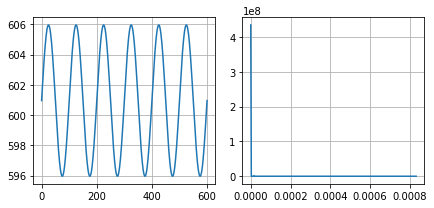

In [52]:
N = 601
t = np.arange(N)
Omg = 0.02*pi
#Original Signal
n1 = np.random.normal(N,np.sqrt(0.3))
x = 5.0*np.sin(Omg*t)+n1 # Witness chanal (Chanel A)
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(t,x)
plt.grid()
#Amplitude spectrum
X=fft(x)
fr=(1/(2*N))*np.linspace(0,1,N/2)
X_m= 2*N*abs(X[0:np.size(fr)])
plt.subplot(132)
plt.plot(fr,X_m)
plt.tight_layout()
plt.grid()

/home/ishanjo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


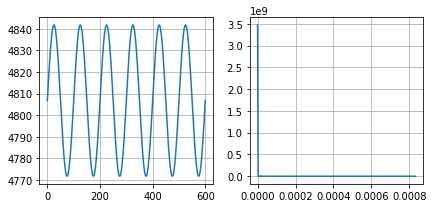

In [53]:
#Observed Signal
n2 = np.random.normal(N,np.sqrt(0.5))
y = 7.0*x+n2 #Chanal B
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(t,y)
plt.grid()
#Amplitude spectrum
Y=fft(y)
fr1=(1/(2*N))*np.linspace(0,1,N/2)
Y_m= 2*N*abs(Y[0:np.size(fr1)])
plt.subplot(132)
plt.plot(fr,Y_m)
plt.tight_layout()
plt.grid()

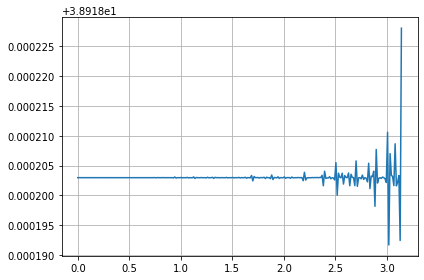

In [41]:
# Wiener Filter
f,Pxx = sig.csd(x,x,nperseg = 514)
f,Pyx = sig.csd(y,x,nperseg = 514)
H = Pyx/Pxx
H = H*np.exp(-1j*np.pi/len(H)*np.arange(len(H))*(len(H)//2))
h = np.fft.irfft(H)
OP_y = np.convolve(y,h,mode='same')
t1 = np.linspace(0,np.pi,num=len(H))
p = np.abs(H)
dB = 20*np.log(p)
plt.plot(t1,dB)
plt.grid()
plt.tight_layout()
              

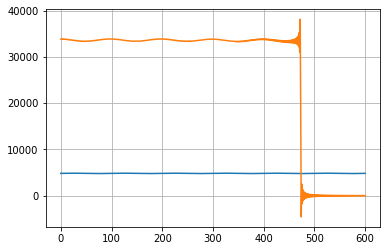

In [42]:
# Comparison Plots
plt.plot(t,y)
plt.plot(t,OP_y)
plt.grid()